# Marketing Project

## Explanations:

## Code details:

## Libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


## 0. Data Preprocess

In [37]:
# Load the dataset from the uploaded file
file_path = './Survey_Results_fixed.csv'
survey_data = pd.read_csv(file_path)
# Display the first few rows and general info about the dataset
survey_data.head()


,Unnamed: 0,Unnamed: 1,Project Questions,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Sr.No.,Response No,1.Have you ever participated in an outdoor or ...,2.Which of the events have you ever attended?,NaN,NaN,NaN,NaN,3.How many times per year do you typically att...,4.What is your main motivation for attending t...,...,23.I value a wide variety of activities enough...,"24.I’d rather have one excellent, well-managed...",25.I prefer a basic location if it offers grea...,"26.If all these factors (Price, Visual Appeal,...",27.Which single factor most often influences y...,28.Which of these statements best describes yo...,29.I often decide whether to attend an event b...,30.If you found an event that matched all your...,31.Gender,32.Age
1,NaN,NaN,,Horseback Riding,Surfing,Hiking,Skiing,NaN,,,...,,,,,,,,,,
2,1,1,Yes,NaN,NaN,NaN,Skiing,NaN,1-2 times,Adventure and excitement,...,4,7,4,7,Outstanding visual and Appealing atmosphere,Experience-Focused: I’m happy to pay more for ...,7,7,Female,36
3,2,2,Yes,NaN,NaN,NaN,NaN,None of the above,3-5 times,Adventure and excitement,...,6,7,5,7,Broad choice of activities,Experience-Focused: I’m happy to pay more for ...,6,7,Female,33
4,3,3,Yes,NaN,NaN,Hiking,NaN,NaN,1-2 times,Adventure and excitement,...,4,7,4,6,Broad choice of activities,Experience-Focused: I’m happy to pay more for ...,6,7,Male,24


In [38]:
# Extract the first row as column headers
columns = survey_data.iloc[0]
survey_data_cleaned = survey_data[1:]  # Remove the first row from the data

# Assign new column names
survey_data_cleaned.columns = columns

# Reset index for better organization
survey_data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned column names for user verification
survey_data_cleaned.columns.tolist()


['Sr.No.',
 'Response No',
 '1.Have you ever participated in an outdoor or adventure event (e.g., surfing, hiking, horseback riding, skiing)?',
 '2.Which of the events have you ever attended?',
 nan,
 nan,
 nan,
 nan,
 '3.How many times per year do you typically attend such events?',
 '4.What is your main motivation for attending these events?',
 '5.How important is the event’s overall cost to you?',
 '6.How important is the environment’s visual and thematic appeal to you?',
 '7.How important is a scenic, easily accessible location when choosing an event?',
 '8.How important are additional amenities (e.g., food, music, freebies) to your enjoyment?',
 '9.How important is having a range of different activities within the same event?',
 '15.€20',
 '16.€30',
 '17.€40',
 '18.€50',
 '19.€60',
 '10.€75',
 '11.€100',
 '12.€125',
 '13.€150',
 '14.€175',
 '20.I’m willing to pay more if the visuals and the atmosphere of the event is particularly outstanding.',
 '21.I would pay more if the locatio

In [39]:
# Drop the first row & 2 columns
survey_data_cleaned.drop(0, axis=0, inplace=True)
survey_data_cleaned = survey_data_cleaned.drop(columns=['Sr.No.','Response No'])
# Fixing column names
survey_data_cleaned.columns.values[0] = '1. Participated'
survey_data_cleaned.columns.values[1] = '2. Events'
survey_data_cleaned.columns.values[6] = '3. Frequency'
survey_data_cleaned.columns.values[7] = '4. Motivation'
survey_data_cleaned.columns.values[8] = '5. Cost importance'
survey_data_cleaned.columns.values[9] = '6. Appeals importance'
survey_data_cleaned.columns.values[10] = '7. Accessibility importance'
survey_data_cleaned.columns.values[11] = '8. Amenities importance'
survey_data_cleaned.columns.values[12] = '9. Activities importance'
survey_data_cleaned.columns.values[23] = '10. Extra atmosphere'
survey_data_cleaned.columns.values[24] = '11. Extra location'
survey_data_cleaned.columns.values[25] = '12. Extra amenities'
survey_data_cleaned.columns.values[26] = '13. Extra activities'
survey_data_cleaned.columns.values[27] = '14. Excellent activitie'
survey_data_cleaned.columns.values[28] = '15. Excellent amenities'
survey_data_cleaned.columns.values[29] = '16. Excellent everything'
survey_data_cleaned.columns.values[30] = '17. Single factor'
survey_data_cleaned.columns.values[31] = '18. Attitude towards paying'
survey_data_cleaned.columns.values[32] = '19. decide on friends’ or social media recom'
survey_data_cleaned.columns.values[33] = '20. Your recommendation'
survey_data_cleaned.columns.values[34] = '21. Gender'
survey_data_cleaned.columns.values[35] = '22. Age'
survey_data_cleaned.columns.tolist()


/var/folders/tx/7mkl83h5303dsx8dlc3zdm4c0000gn/T/ipykernel_25090/904965629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_data_cleaned.drop(0, axis=0, inplace=True)


['1. Participated',
 '2. Events',
 nan,
 nan,
 nan,
 nan,
 '3. Frequency',
 '4. Motivation',
 '5. Cost importance',
 '6. Appeals importance',
 '7. Accessibility importance',
 '8. Amenities importance',
 '9. Activities importance',
 '15.€20',
 '16.€30',
 '17.€40',
 '18.€50',
 '19.€60',
 '10.€75',
 '11.€100',
 '12.€125',
 '13.€150',
 '14.€175',
 '10. Extra atmosphere',
 '11. Extra location',
 '12. Extra amenities',
 '13. Extra activities',
 '14. Excellent activitie',
 '15. Excellent amenities',
 '16. Excellent everything',
 '17. Single factor',
 '18. Attitude towards paying',
 '19. decide on friends’ or social media recom',
 '20. Your recommendation',
 '21. Gender',
 '22. Age']

In [40]:
survey_data_cleaned.loc[::,'2. Events':survey_data_cleaned.columns.values[5]:1]


,2. Events,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Skiing,NaN
2,NaN,NaN,NaN,NaN,None of the above
3,NaN,NaN,Hiking,NaN,NaN
4,Horseback Riding,NaN,NaN,NaN,NaN
5,NaN,NaN,Hiking,NaN,NaN
...,...,...,...,...,...
65,NaN,NaN,Hiking,NaN,NaN
66,NaN,NaN,NaN,NaN,None of the above
67,NaN,NaN,NaN,NaN,None of the above
68,Horseback Riding,NaN,NaN,NaN,NaN


### Done already

In [41]:
survey_data_cleaned.columns


Index([                             '1. Participated',
                                          '2. Events',
                                                  nan,
                                                  nan,
                                                  nan,
                                                  nan,
                                       '3. Frequency',
                                      '4. Motivation',
                                 '5. Cost importance',
                              '6. Appeals importance',
                        '7. Accessibility importance',
                            '8. Amenities importance',
                           '9. Activities importance',
                                             '15.€20',
                                             '16.€30',
                                             '17.€40',
                                             '18.€50',
                                             '19.€60',
          

In [42]:
survey_data_cleaned.iloc[:,24:30]


,11. Extra location,12. Extra amenities,13. Extra activities,14. Excellent activitie,15. Excellent amenities,16. Excellent everything
1,7,7,4,7,4,7
2,1,6,6,7,5,7
3,6,5,4,7,4,6
4,6,4,5,6,5,5
5,5,4,4,4,4,4
...,...,...,...,...,...,...
65,4,2,2,5,1,2
66,4,1,1,7,4,4
67,7,4,4,7,3,7
68,4,4,4,5,5,4


In [43]:
#Q1 --------------------
# Convert the first question to binary (assuming "Yes" -> 1, "No" -> 0)
survey_data_cleaned['1. Participated'] = survey_data_cleaned['1. Participated'].apply(lambda x: 1 if x == 'Yes' else 0)


#Q2 ----------------------
change_list = ['2. Events', 'Surfing', 'Hiking', 'Skiing', 'None of the above']
# fixing column names of Q2 and the NaN values
survey_data_cleaned.columns.values[1:6] = change_list

# Function to consolidate values from all columns into one
def consolidate_events(row):
    # Drop NaN values and join the remaining words into a single string
    events = row[change_list].dropna().tolist()
    
    # If no valid events, add 'None of the above'
    if not events:
        events.append('None of the above')
    
    # Join the list into a string
    return ', '.join(events)

# Apply the function across all rows
survey_data_cleaned['2. Events'] = survey_data_cleaned.loc[::,'2. Events':survey_data_cleaned.columns.values[5]:1].apply(consolidate_events, axis=1)
survey_data_cleaned.drop(columns=['Surfing', 'Hiking', 'Skiing', 'None of the above'], inplace=True)

#Q3 ----------------------
def map_frequency(value):
    if value == '0 times':
        return 0
    elif value == '1-2 times':
        return 1  # Midpoint of the range
    elif value == '3-5 times':
        return 2  # Midpoint of the range
    elif value == '6+ times':
        return 3  # Or any number representing '6+'
    return 0  # In case there are unexpected values

# Apply the mapping function to the 'Frequency' column
survey_data_cleaned['3. Frequency'] = survey_data_cleaned['3. Frequency'].apply(map_frequency)

#Q4 ----------------------
survey_data_cleaned = pd.get_dummies(survey_data_cleaned, columns=['4. Motivation'], dtype='int')

#Q10-19 ---------------------
# Step 1: Identify columns matching the pattern `number.€price`
import re

def is_price_column(col_name):
    # Check if the column matches the pattern `number.€price`
    return bool(re.match(r'^\d+\.\€\d+$', col_name))

# Filter the columns that are price-related
price_columns = [col for col in survey_data_cleaned.columns if is_price_column(col)]
price_columns

# Step 2: Extract the numeric price from column names
price_mapping = {col: float(col.split('.')[1].strip('€')) for col in price_columns}

# Rename only the price columns
survey_data_cleaned.rename(columns=price_mapping, inplace=True)
# Step 3: Create a function to get min and max prices where response is "Yes, I would buy." or "Yes, I would buy"
def get_min_max_prices(row):
    # Extract prices where the response is "Yes, I would buy." OR "Yes, I would buy"
    yes_prices = [
        price for price in price_mapping.values()
        if row.get(price) in ["Yes, I would buy.", "Yes, I would buy"]
    ]
    if yes_prices:
        return pd.Series([min(yes_prices), max(yes_prices)])
    return pd.Series([0, 0])
# Step 4: Apply the function to the DataFrame

survey_data_cleaned[['min_total_price', 'max_total_price']] = survey_data_cleaned.apply(get_min_max_prices, axis=1)
survey_data_cleaned[['min_surfing_price', 'max_surfing_price']] = survey_data_cleaned.iloc[:,13:18].apply(get_min_max_prices, axis=1)
survey_data_cleaned[['min_horse_price', 'max_horse_price']] = survey_data_cleaned.iloc[:,8:13].apply(get_min_max_prices, axis=1)

survey_data_cleaned.drop(columns=[75.0, 100.0, 125.0, 150.0, 175.0, 20.0, 30.0, 40.0, 50.0, 60.0], inplace=True)

#Q17 ----------------------
survey_data_cleaned = pd.get_dummies(survey_data_cleaned, columns=['17. Single factor'], dtype='int')

#Q18 ---------------------
def map_frequency_q18(value):
    if value == 'Cost-Focused: I tend to choose the cheapest options':
        return 1
    elif value == 'Spontaneous: It varies; I decide case by case':
        return 2  # Midpoint of the range
    elif value == 'Balanced: I pay more only if it truly seems worth it':
        return 3  # Midpoint of the range
    elif value == "Experience-Focused: I’m happy to pay more for a unique experience":
        return 4  # Or any number representing '6+'
    return 0  # In case there are unexpected values

# Apply the mapping function to the 'Frequency' column
survey_data_cleaned['18. Attitude towards paying'] = survey_data_cleaned['18. Attitude towards paying'].apply(map_frequency_q18)


### Todo

In [44]:
survey_data_cleaned.columns


Index(['1. Participated', '2. Events', '3. Frequency', '5. Cost importance',
       '6. Appeals importance', '7. Accessibility importance',
       '8. Amenities importance', '9. Activities importance',
       '10. Extra atmosphere', '11. Extra location', '12. Extra amenities',
       '13. Extra activities', '14. Excellent activitie',
       '15. Excellent amenities', '16. Excellent everything',
       '18. Attitude towards paying',
       '19. decide on friends’ or social media recom',
       '20. Your recommendation', '21. Gender', '22. Age',
       '4. Motivation_Adventure and excitement',
       '4. Motivation_Other (please only choose if fits best)',
       '4. Motivation_Relaxation and escaping routine',
       '4. Motivation_Socializing and meeting new people', 'min_total_price',
       'max_total_price', 'min_surfing_price', 'max_surfing_price',
       'min_horse_price', 'max_horse_price',
       '17. Single factor_Broad choice of activities',
       '17. Single factor_Convenien

### Converting the Categorical columns (2. Events, 21. Gender)

In [45]:
survey_data_cleaned["21. Gender"] = survey_data_cleaned["21. Gender"].map({"Male": 0, "Female": 1})  # Convert Gender to 0/1
survey_data_cleaned = pd.get_dummies(survey_data_cleaned, columns=["2. Events"], dtype='int')  # One-hot encode "Events" column

#Q5 ----------------------
#Q6 ----------------------
#Q7 ----------------------
#Q8 ----------------------
#Q9 ----------------------

#Q20 ---------------------
#Q21 ---------------------
#Q22 ---------------------

# Show the updated DataFrame
survey_data_cleaned.head()


,1. Participated,3. Frequency,5. Cost importance,6. Appeals importance,7. Accessibility importance,8. Amenities importance,9. Activities importance,10. Extra atmosphere,11. Extra location,12. Extra amenities,...,2. Events_Hiking,"2. Events_Hiking, Skiing",2. Events_Horseback Riding,"2. Events_Horseback Riding, Hiking","2. Events_Horseback Riding, Hiking, Skiing",2. Events_None of the above,2. Events_Skiing,2. Events_Surfing,"2. Events_Surfing, Hiking","2. Events_Surfing, Skiing"
1,1,1,6,6,7,7,6,7,7,7,...,0,0,0,0,0,0,1,0,0,0
2,1,2,5,3,6,5,4,7,1,6,...,0,0,0,0,0,1,0,0,0,0
3,1,1,4,6,5,6,4,5,6,5,...,1,0,0,0,0,0,0,0,0,0
4,1,1,4,6,6,6,6,5,6,4,...,0,0,1,0,0,0,0,0,0,0
5,1,2,5,6,4,3,5,4,5,4,...,1,0,0,0,0,0,0,0,0,0


In [46]:
# Save the result DataFrame to an Excel file
survey_data_cleaned.to_excel("survey_data_cleaned.xlsx", index=False)

print("File saved successfully as 'survey_results.xlsx'")


File saved successfully as 'survey_results.xlsx'


## 1. Behavioral customer segmentation

### RFM

### Recency, Frequency and Monetary

'''Recency → How recently the customer attended an event (Column: "1. Participated")

Frequency → How often they attend events (Column: "3. Frequency")

Monetary → Their willingness to pay or cost importance (Column: "5. Cost importance" or min/max price columns)'''


In [47]:
# Step 1: Define RFM Metrics
rfm = survey_data_cleaned[["1. Participated", "3. Frequency", "5. Cost importance"]].copy()
rfm.columns = ["Recency", "Frequency", "Monetary"]  # Rename for clarity


In [48]:
# Step 2: Normalize the Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [49]:
# Step 3: Assign RFM Scores (Simple Percentiles)
rfm["R_Score"] = pd.qcut(rfm["Recency"].rank(method="first"), 4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"].rank(method="first"), 4, labels=[1, 2, 3, 4])


In [50]:
# Step 4: Create Final RFM Segments
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].sum(axis=1)


In [51]:
# Define Customer Segments
seg_map = {
    (9, 10, 11, 12): "Best Customers",
    (5, 6, 7, 8): "Loyal Customers",
    (3, 4): "Potential Customers",
    (1, 2): "At Risk"
}

rfm["Segment"] = rfm["RFM_Score"].apply(lambda x: next((v for k, v in seg_map.items() if x in k), "Others"))

# Step 5: Save Results
rfm.to_csv("rfm_segments.csv", index=False)
print(rfm.head())


   Recency  Frequency Monetary R_Score F_Score M_Score  RFM_Score  \
1        1          1        6       4       1       3          8   
2        1          2        5       4       3       2          9   
3        1          1        4       4       1       1          6   
4        1          1        4       4       1       1          6   
5        1          2        5       4       3       2          9   

           Segment  
1  Loyal Customers  
2   Best Customers  
3  Loyal Customers  
4  Loyal Customers  
5   Best Customers  



## **2. Pricing Analysis**
### 1️⃣ Introduction
This analysis focuses on **optimal pricing strategies** for **Surfing and Horse Riding** using:
- **Revenue Maximization**
- **Optimal Price Selection**
- **Comparison of Different Price Points**

We used **valid price levels** for each activity:
- **Surfing:** 75€, 100€, 125€, 150€, 175€
- **Horse Riding:** 20€, 30€, 40€, 50€, 60€

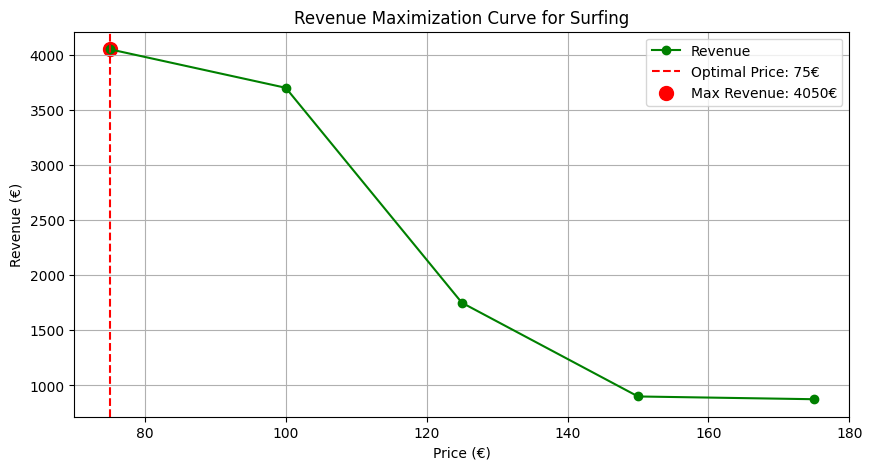

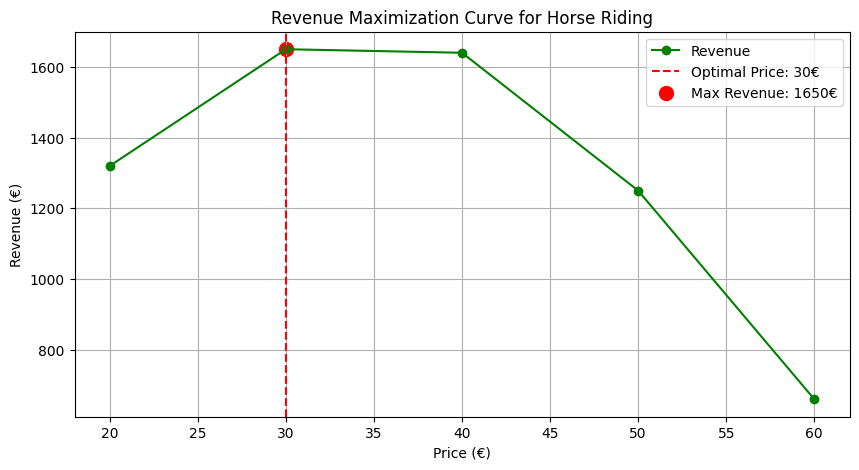


📌 **Optimal Pricing Results**
🔹 **Surfing**: Optimal Price = 75 €, Max Revenue = 4050 €, Customers = 54
🔹 **Horse Riding**: Optimal Price = 30 €, Max Revenue = 1650 €, Customers = 55


In [53]:
pricing_df = survey_data_cleaned.copy()

valid_prices = {
    "surfing": [75, 100, 125, 150, 175],
    "horse_riding": [20, 30, 40, 50, 60]
}

def compute_revenue(price_levels, event):
    """Computes revenue at each price level based on users willing to pay that amount."""
    revenues = []
    willing_customers = []

    for price in price_levels:
        willing_to_pay = pricing_df[(pricing_df[f"min_{event}_price"] <= price) & 
                                    (pricing_df[f"max_{event}_price"] >= price)]
        revenue = price * len(willing_to_pay)
        revenues.append(revenue)
        willing_customers.append(len(willing_to_pay))

    return revenues, willing_customers

# Compute revenues and number of customers for valid price levels
surfing_revenues, surfing_customers = compute_revenue(valid_prices["surfing"], "surfing")
horse_revenues, horse_customers = compute_revenue(valid_prices["horse_riding"], "horse")

# Step 3: Identify the optimal price that maximizes revenue
def find_optimal_price(price_levels, revenues, customers):
    """Finds the price level with the highest revenue and returns details."""
    max_index = np.argmax(revenues)
    optimal_price = price_levels[max_index]
    max_revenue = revenues[max_index]
    num_customers = customers[max_index]

    return optimal_price, max_revenue, num_customers

# Get optimal prices for Surfing and Horse Riding
optimal_surfing_price, max_surfing_revenue, surfing_customers_at_optimal = find_optimal_price(valid_prices["surfing"], surfing_revenues, surfing_customers)
optimal_horse_price, max_horse_revenue, horse_customers_at_optimal = find_optimal_price(valid_prices["horse_riding"], horse_revenues, horse_customers)

# Step 4: Plot Revenue Curves with Optimal Price
def plot_revenue_curve(price_levels, revenues, optimal_price, max_revenue, title):
    """Plots the revenue maximization curve and marks the optimal price."""
    plt.figure(figsize=(10, 5))
    plt.plot(price_levels, revenues, marker='o', linestyle='-', color='green', label="Revenue")
    plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: {optimal_price}€')
    plt.scatter(optimal_price, max_revenue, color='red', s=100, label=f"Max Revenue: {max_revenue}€")
    plt.xlabel("Price (€)")
    plt.ylabel("Revenue (€)")
    plt.title(f"Revenue Maximization Curve for {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Surfing and Horse Riding
plot_revenue_curve(valid_prices["surfing"], surfing_revenues, optimal_surfing_price, max_surfing_revenue, "Surfing")
plot_revenue_curve(valid_prices["horse_riding"], horse_revenues, optimal_horse_price, max_horse_revenue, "Horse Riding")

# Step 5: Print the optimal price findings
print("\n📌 **Optimal Pricing Results**")
print(f"🔹 **Surfing**: Optimal Price = {optimal_surfing_price} €, Max Revenue = {max_surfing_revenue} €, Customers = {surfing_customers_at_optimal}")
print(f"🔹 **Horse Riding**: Optimal Price = {optimal_horse_price} €, Max Revenue = {max_horse_revenue} €, Customers = {horse_customers_at_optimal}")


### 2️⃣ Revenue Maximization Results
#### 🔹 Surfing
- Optimal Price: **75€**
- Max Revenue: **4050€**
- Demand sharply declines after 75€, causing a revenue drop.
- Pricing above 75€ reduces total revenue significantly.
  
💡 **Insight:** 75€ is the best trade-off between price and demand. Setting a higher price causes a sharp decline in customers. Increasing prices beyond 75€ reduces customer willingness to pay, leading to lower revenue.

#### 🔹 Horse Riding
- Optimal Price: **30€**
- Max Revenue: **1650€**
- Revenue remains stable at 40€, but drops significantly at 50€.
- Lower prices attract more customers, maximizing revenue.
  
💡 **Insight:** 30€ is the best price, but 40€ might also be a good alternative as revenue is stable before dropping at 50€.

---

### **3️⃣ Interpretation & Business Logic**
| Sport | Expected Behavior | Model Matches? |
|--------|-----------------|----------------|
| **Surfing** | Luxury activity → People willing to pay more, but demand drops at high prices | ✅ Yes, demand collapses after 75€ |
| **Horse Riding** | More accessible → Larger audience willing to pay, but price-sensitive | ✅ Yes, price sensitivity is clear after 40€ |

✅ Our model successfully identifies revenue-maximizing price points while respecting customer behavior.

---
## 3. Needs-based segmentation


### Steps for Needs-based Segmentation

✅ Step 1: Identify Key Needs-Based Attributes
the following columns are useful for understanding needs-based segmentation:
"5. Cost importance"
"6. Appeals importance"
"7. Accessibility importance"
"8. Amenities importance"
"9. Activities importance"
Preferences (What customers value most):
"17. Single factor_*" (Choice of activities, price, location, quality, etc.)
"10-16" (Extra atmosphere, location, amenities, activities, excellence perception)
Motivations for Attending Events:
"4. Motivation_*" (Adventure, Relaxation, Socializing, etc.)


✅ Step 2: Segmentation via Clustering
We can use K-Means Clustering on these attributes to create needs-based customer segments (e.g., Budget-Conscious, Experience-Seekers, Social Attendees).


✅ Step 3: Results Discussion
Once we get clusters, we analyze:

-- Which attributes were most important?

-- Are the segments meaningful?

-- Any bias due to survey limitations?

In [ ]:
# Select relevant columns for needs-based segmentation
features = ["5. Cost importance", "6. Appeals importance", "7. Accessibility importance", 
            "8. Amenities importance", "9. Activities importance", 
            "17. Single factor_Broad choice of activities", "17. Single factor_Convenient or appealing location", 
            "17. Single factor_High-quality amenities", "17. Single factor_Lowest price", 
            "4. Motivation_Adventure and excitement", "4. Motivation_Relaxation and escaping routine", 
            "4. Motivation_Socializing and meeting new people"]

data_cluster = survey_data_cleaned[features].copy()


In [ ]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)


In [ ]:
# Elbow Method & Silhouette Score to find the optimal number of clusters
wcss = []
silhouette_scores = []

for k in range(2, 11):  # Starting from 2 since silhouette score isn't defined for 1 cluster
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


In [ ]:
# Plotting the Elbow Method
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.tight_layout()
plt.show()


In [ ]:
# Determine the optimal k based on the highest Silhouette Score
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")


In [ ]:
# Apply K-Means with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
survey_data_cleaned["Needs_Cluster"] = kmeans_final.fit_predict(data_scaled)


In [ ]:
# Display cluster averages
print(survey_data_cleaned.groupby("Needs_Cluster")[features].mean())
